## **Import Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Load the Dataset:**

In [ ]:
df = pd.read_csv('/content/BlackFridaySales.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## **Data Cleaning:**

In [ ]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### **1. Purchase Behavior Analysis:**
Analyze the distribution of the Purchase amount. Are there specific groups (e.g., age groups, gender, or city categories) that tend to spend more?


In [ ]:
gender_wise_amt = df.groupby('Gender')['Purchase'].sum().reset_index()
gender_wise_amt

,Gender,Purchase
0,F,1186232642
1,M,3909580100


Text(0.5, 1.0, 'Purchase Distribution by Gender')

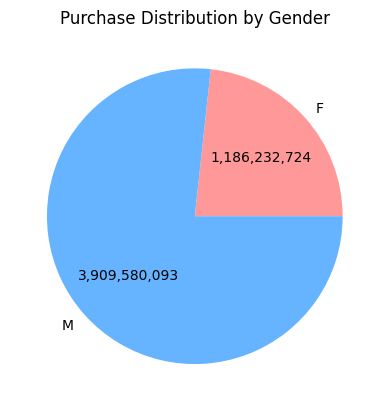

In [ ]:
l = list(gender_wise_amt['Purchase'])
colors = ['#ff9999','#66b3ff']

plt.pie(gender_wise_amt['Purchase'], labels=gender_wise_amt['Gender'],colors=colors,autopct=lambda p: f'{int(p * sum(l) / 100):,}')
plt.title('Purchase Distribution by Gender')

In [ ]:
city_catwise_amt = df.groupby('City_Category')['Purchase'].sum().reset_index()

In [ ]:
city_catwise_amt

,City_Category,Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


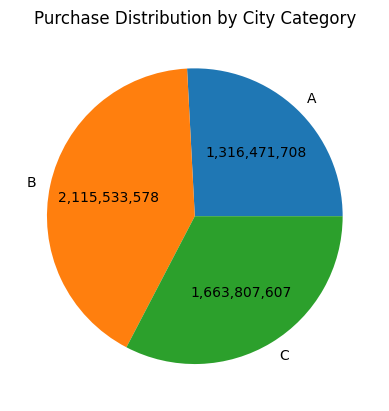

In [ ]:
l1 = city_catwise_amt['Purchase']

plt.pie(city_catwise_amt["Purchase"],labels=city_catwise_amt['City_Category'],autopct=lambda p: f'{int(p * sum(l1) / 100):,}')
plt.title('Purchase Distribution by City Category')
plt.show()

In [ ]:
age_wise_amt = df.groupby('Age')['Purchase'].sum().reset_index()
age_wise_amt

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


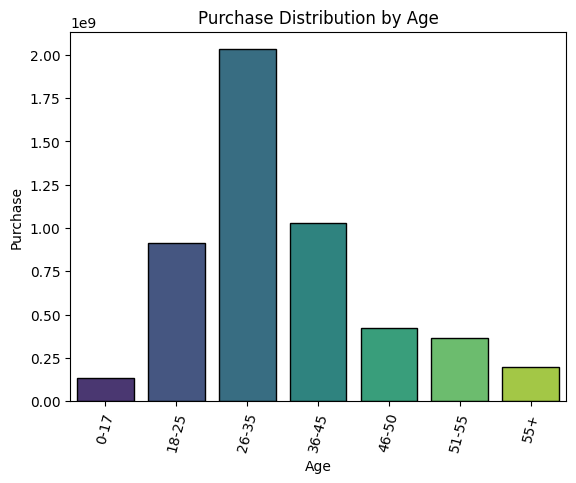

In [ ]:
sns.barplot(x='Age',y='Purchase',data=age_wise_amt,palette='viridis',edgecolor='black')
plt.title('Purchase Distribution by Age')
plt.xticks(rotation=75)
plt.show()

After analysing this case,

* Purchase amount of male are higher then the female.
* Purchase distribution of city category B is higher followed by city C and A.
* People of age group 26-35 having higher purchase rate.

#### **2. Product Category Insights:**
Explore the distribution of purchases across different Product_Category_1, Product_Category_2, and Product_Category_3. Which product categories are the most popular?

In [ ]:
prod_cat_1 = df.groupby('Product_Category_1')['Purchase'].sum().reset_index()

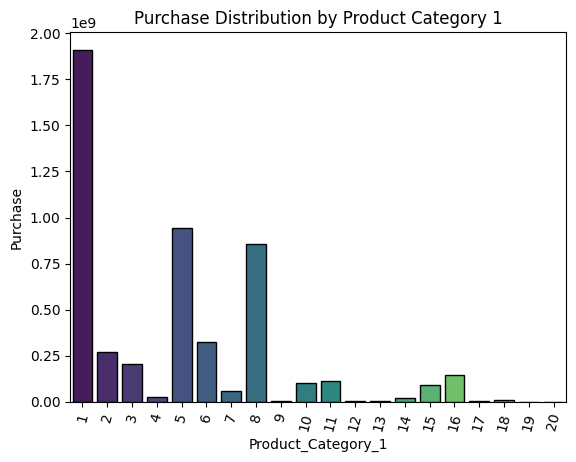

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',data=prod_cat_1,palette='viridis',edgecolor='black')
plt.title('Purchase Distribution by Product Category 1')
plt.xticks(rotation=75)
plt.show()

#### 1 in the Product_category_1 has been purchased more followed by 5

In [ ]:
prod_cat_2 = df.groupby('Product_Category_2')['Purchase'].sum().reset_index()

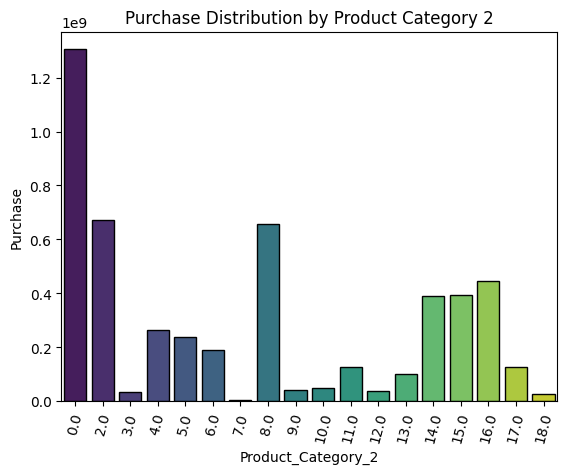

In [ ]:
sns.barplot(x='Product_Category_2',y='Purchase',data=prod_cat_2,palette='viridis',edgecolor='black')
plt.title('Purchase Distribution by Product Category 2')
plt.xticks(rotation=75)
plt.show()

#### 2 in the Product_category_2 has been purchased more followed by 8 excluding 0 from the insights beacause all were null values

In [ ]:
prod_cat_3 = df.groupby('Product_Category_3')['Purchase'].sum().reset_index()

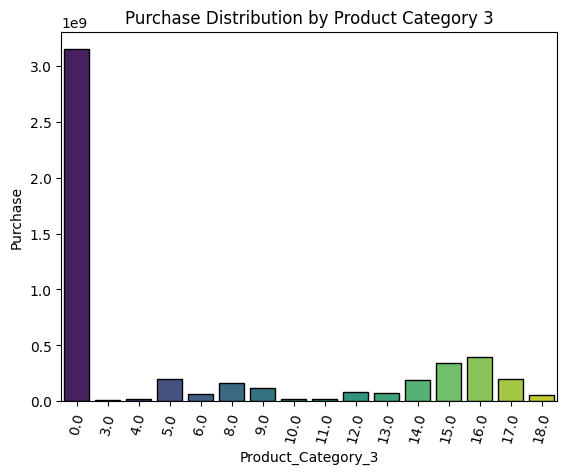

In [ ]:
sns.barplot(x='Product_Category_3',y='Purchase',data=prod_cat_3,palette='viridis',edgecolor='black')
plt.title('Purchase Distribution by Product Category 3')
plt.xticks(rotation=75)
plt.show()

#### 16 in the Product_category_3 has been purchased more followed by 15 excluding 0 from the insights beacause all were null values

#### **3. Customer Demographics:**
Analyze the distribution of customers based on Age, Gender, and City_Category. Which demographic group is most active during the Black Friday sales?**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


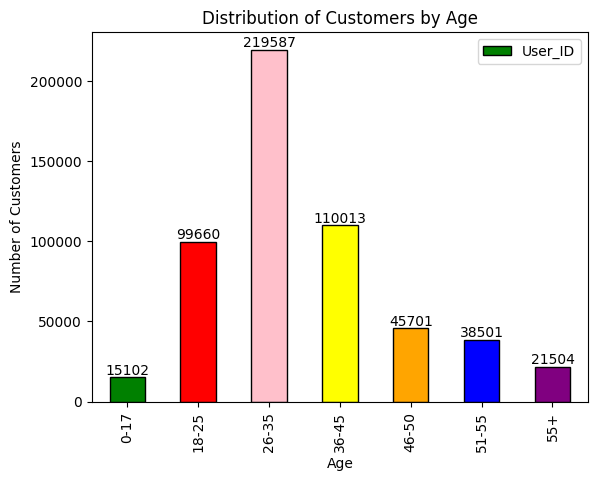

In [ ]:
zx = df.groupby('Age')['User_ID'].count().reset_index().plot(kind='bar',x='Age',y='User_ID',color=['green','red','pink','yellow','orange','blue','purple'],edgecolor='black')
plt.title('Distribution of Customers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
for i in zx.containers:
  zx.bar_label(i)
plt.show()

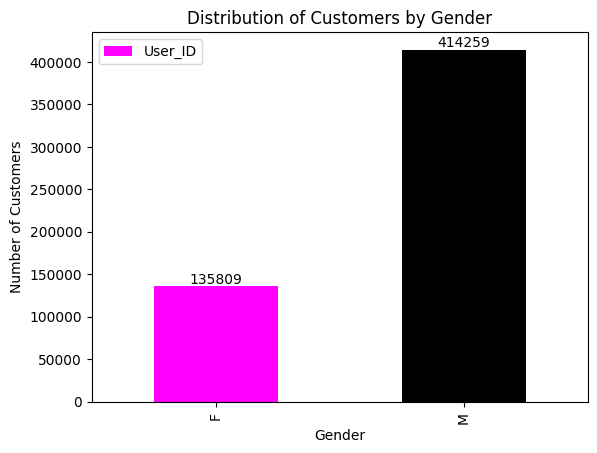

In [ ]:
bx = df.groupby('Gender')['User_ID'].count().reset_index().plot(kind='bar',x='Gender',y='User_ID',color=['magenta','black'])
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
for p in bx.containers:
    bx.bar_label(p)
plt.show()

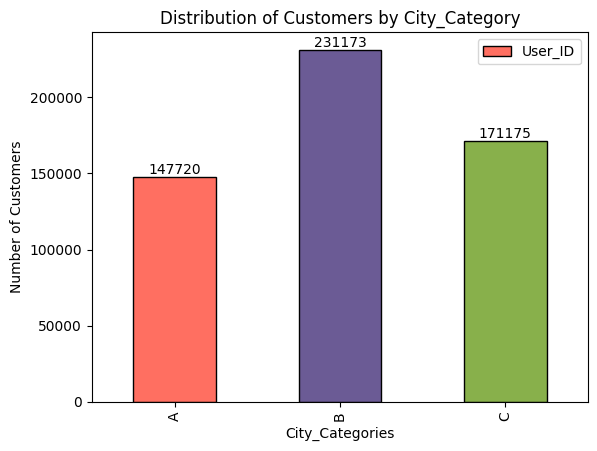

In [ ]:
cx = df.groupby('City_Category')['User_ID'].count().reset_index().plot(kind='bar',x='City_Category',y='User_ID',color = ['#FF6F61', '#6B5B95', '#88B04B'],edgecolor='black')
plt.title('Distribution of Customers by City_Category')
plt.xlabel('City_Categories')
plt.ylabel('Number of Customers')
for p in cx.containers:
    cx.bar_label(p)
plt.show()

After analysing this case,

* No of Customers of Age-group 26-35 are maximum.
* Male Customers are more than the Female customers.
* Number of customers from City_category B is higher followed by city C and A.

#### **4. Impact of Occupation:**
Investigate the relationship between Occupation and Purchase. Are certain occupations associated with higher purchase amounts?

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


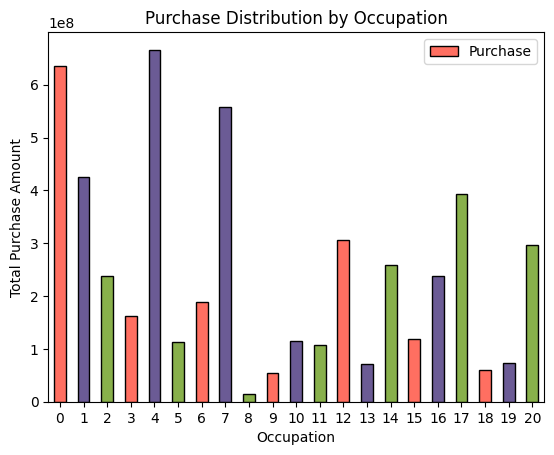

In [ ]:
df.groupby('Occupation')['Purchase'].sum().reset_index().plot(kind='bar',x='Occupation',y='Purchase',color=['#FF6F61', '#6B5B95', '#88B04B'],edgecolor='black')
plt.title('Purchase Distribution by Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation=0)
plt.ylabel('Total Purchase Amount')
plt.show()

Insights Gain: Occupation 4 has purchased amount higher followed by Occupation 0.

#### **5. City-wise Purchase Behavior:**

Explore the purchase behavior across different City_Category. Are there significant differences in spending patterns among the cities?

Text(0, 0.5, 'Total Purchase Amount')

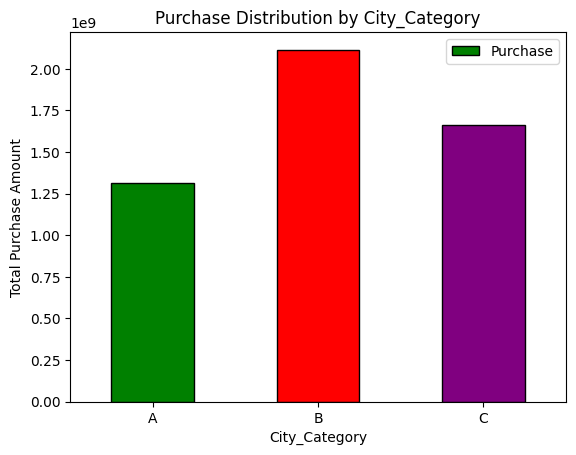

In [ ]:
df.groupby('City_Category')['Purchase'].sum().reset_index().plot(kind='bar',x='City_Category',y='Purchase',color=['green','red','purple'],edgecolor='black')
plt.title('Purchase Distribution by City_Category')
plt.xlabel('City_Category')
plt.xticks(rotation=0)
plt.ylabel('Total Purchase Amount')

This graphical representation of purchase total with city categories and City category B has the highest purchase amount.

### **6. Stay in Current City:**
Analyze how the duration of stay in the current city (Stay_In_Current_City_Years) affects purchase behavior. Do longer stays correlate with higher spending?

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


Text(0, 0.5, 'Total Purchase Amount')

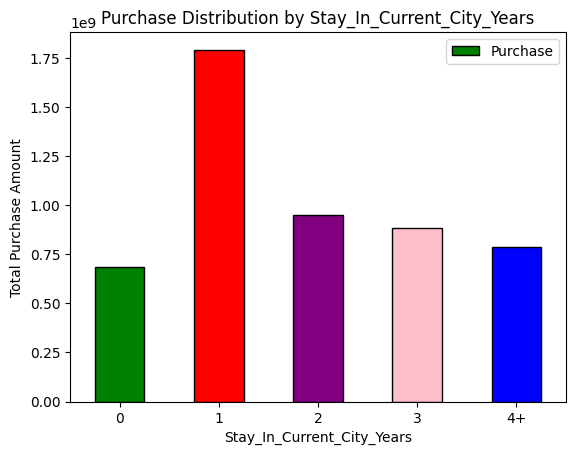

In [ ]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index().plot(kind='bar',x='Stay_In_Current_City_Years',y='Purchase',color=['green','red','purple','pink','blue'],edgecolor='black')
plt.title('Purchase Distribution by Stay_In_Current_City_Years')
plt.xlabel('Stay_In_Current_City_Years')
plt.xticks(rotation=0)
plt.ylabel('Total Purchase Amount')

Insights Gain: Stay for 1 years has the highest purchase amount.
No, longer stays don't correlate with higher spending.

### **7. Correlation Between Product Categories:**
Examine if there's any correlation between the three product categories (Product_Category_1, Product_Category_2, and Product_Category_3). Do customers who buy from one category tend to buy from another?


In [ ]:
df['Product_Category_1'] = df['Product_Category_1'].astype(int)
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


In [ ]:
corr_cat = df[['Product_Category_1','Product_Category_2','Product_Category_3']].corr()

In [ ]:
corr_cat

,Product_Category_1,Product_Category_2,Product_Category_3
Product_Category_1,1.000000,-0.067877,-0.385534
Product_Category_2,-0.067877,1.000000,0.094750
Product_Category_3,-0.385534,0.094750,1.000000


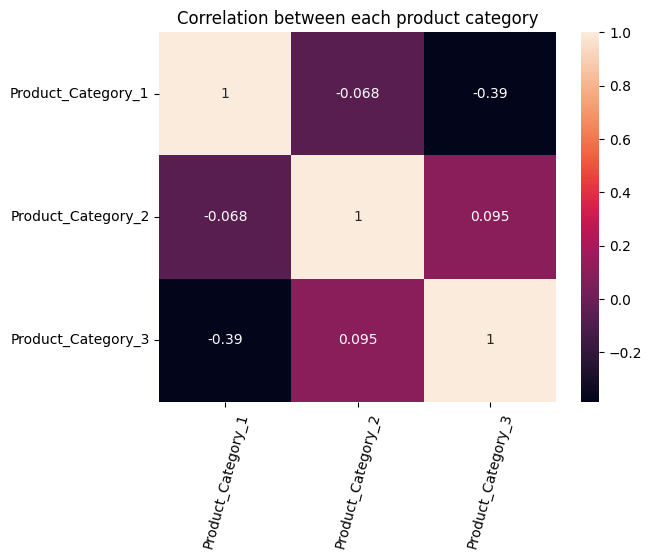

In [ ]:
sns.heatmap(corr_cat,annot=True)
plt.title('Correlation between each product category')
plt.xticks(rotation=75)
plt.show()

### **8. Outlier Analysis:**
Identify any outliers in the Purchase data. How do these outliers affect the overall analysis?

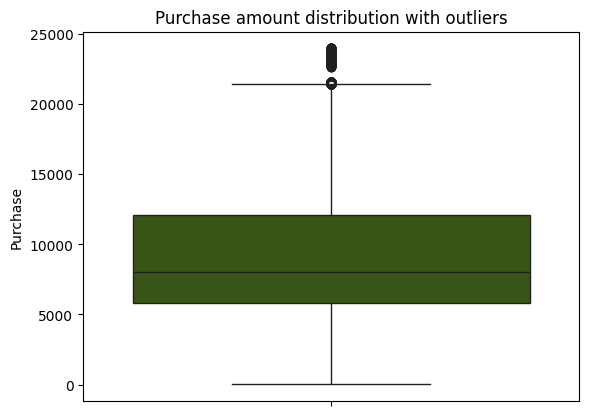

In [ ]:
sns.boxplot(df['Purchase'],color='#395f0d')
plt.title('Purchase amount distribution with outliers')
plt.show()

Box Plot helps visually identify outliers that lie outside the typical range of the data.

Mean outliers heavily influence the mean (average) by pulling it toward the extreme values

## **9. Gender-wise Product Preferences:**
Investigate if there are significant differences in product category preferences between male and female customers.


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [ ]:
Gender_wise_Cat1 = df.groupby('Gender')['Product_Category_1'].value_counts()

In [ ]:
Gender_wise_Cat1

Gender  Product_Category_1
F       5                      41961
        8                      33558
        1                      24831
        3                       6006
        2                       5658
        11                      4739
        6                       4559
        4                       3639
        16                      2402
        12                      1532
        13                      1462
        10                      1162
        15                      1046
        7                        943
        20                       723
        14                       623
        19                       451
        18                       382
        9                         70
        17                        62
M       1                     115547
        5                     108972
        8                      80367
        11                     19548
        2                      18206
        6                      15907
        3                      14207
        4                       8114
        16                      7426
        15                      5244
        13                      4087
        10                      3963
        7                       2778
        18                      2743
        12                      2415
        20                      1827
        19                      1152
        14                       900
        17                       516
        9                        340
Name: count, dtype: int64

In [ ]:
Gender_wise_Cat1.unstack()

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827


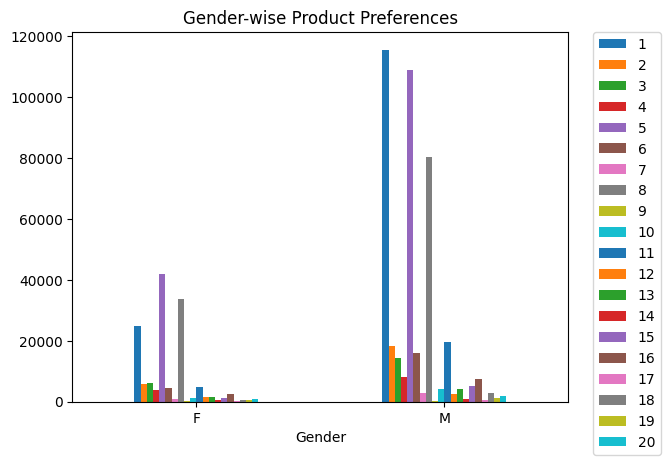

In [ ]:
# sns.barplot(x='Gender',y='count',hue='Product_Category_1',data=Gender_wise_Cat1,edgecolor='black')
Gender_wise_Cat1.unstack().plot(kind='bar',label='Product_Category_1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Gender-wise Product Preferences')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Gender_wise_Cat2 = df.groupby('Gender')['Product_Category_2'].value_counts()

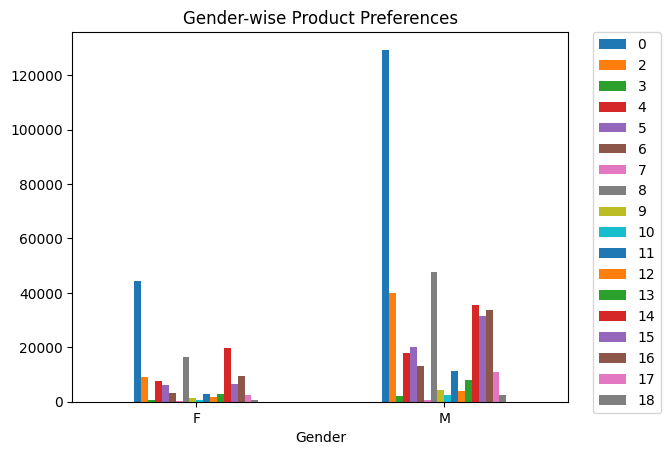

In [ ]:
Gender_wise_Cat2.unstack().plot(kind='bar',label='Product_Category_2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Gender-wise Product Preferences')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Gender_wise_Cat3 = df.groupby('Gender')['Product_Category_3'].value_counts()

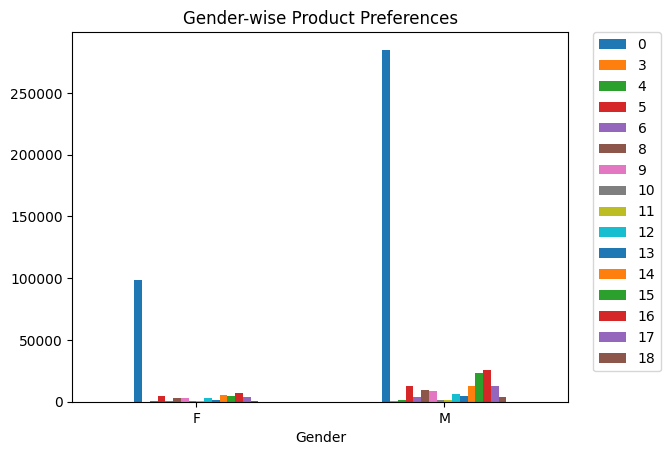

In [ ]:
Gender_wise_Cat3.unstack().plot(kind='bar',label='Product_Category_3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Gender-wise Product Preferences')
plt.xticks(rotation=0)
plt.show()

### **10. Advanced Insights:**
Use advanced visualizations like heatmaps or pair plots to discover any hidden patterns or relationships within the data.


In [ ]:
numeric_df = df.select_dtypes(include=['number'])

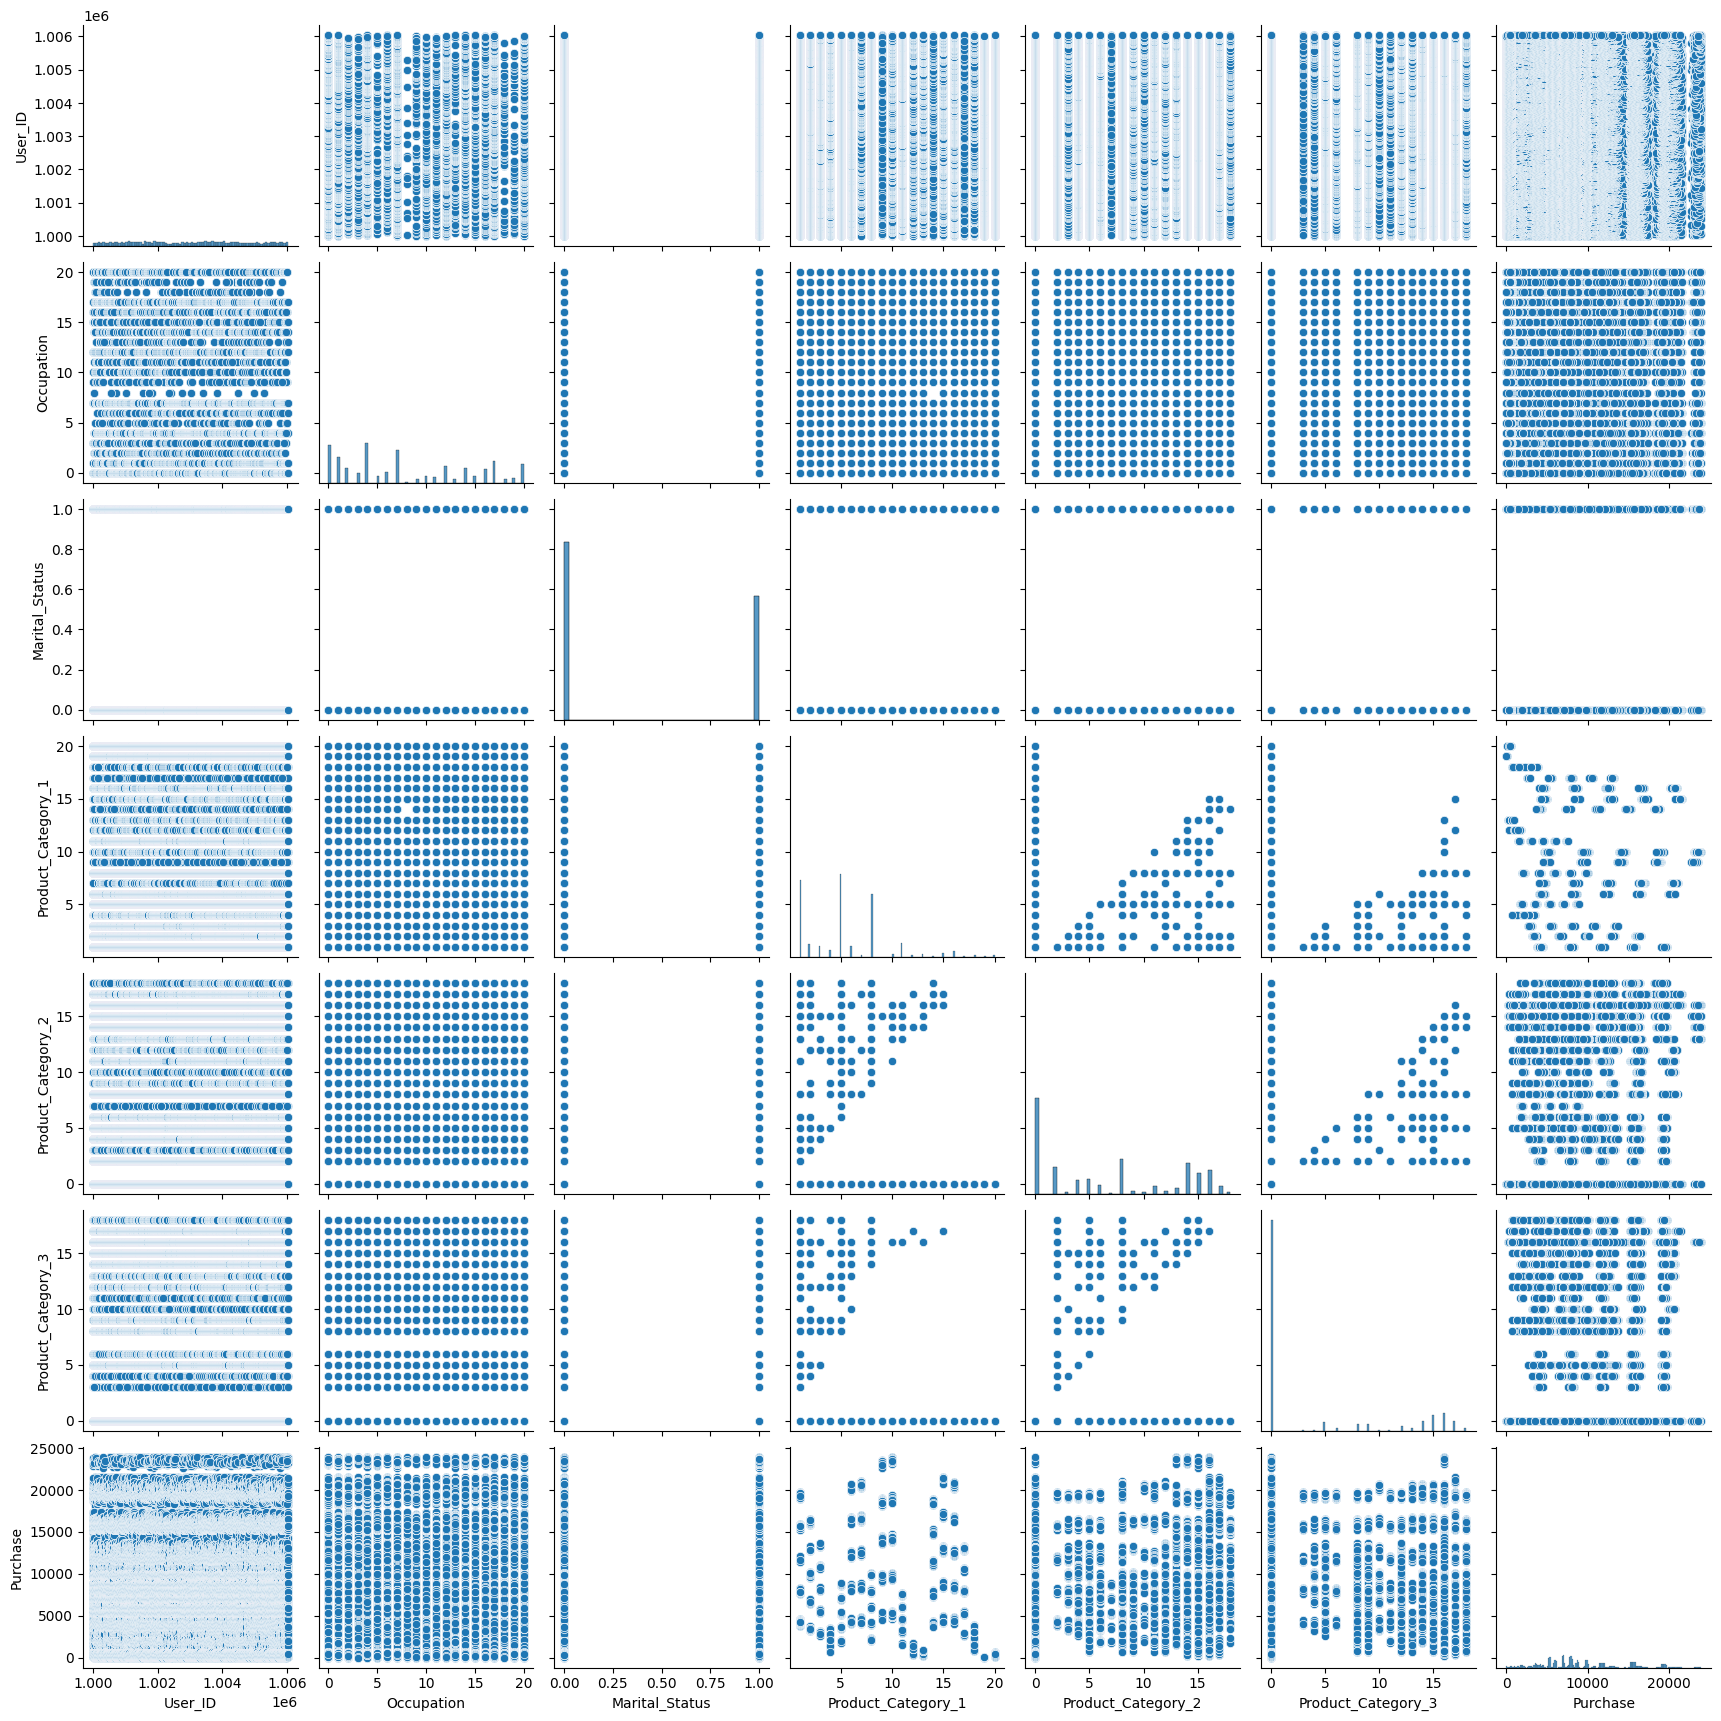

In [ ]:
sns.pairplot(numeric_df)

### **Insights and Conclusion:**

1. Males have higher purchase amounts than females.
2. City category B leads in purchase distribution and total purchases, followed by cities C and A.
3. Age group 26-35 shows the highest purchase rate and has the most customers.
4. Product Purchases: Highest in Product_category_1 (product 1), Product_category_2 (product 2), and Product_category_3 (product 16).
5. Male customers outnumber females.
6. Occupation 4 spends the most, followed by Occupation 0.
7. Customers with a 1-year stay duration spend the most; longer stays don’t correlate with higher spending.
8. Box plots show outliers influencing the mean.